# COMP3314 HW1-Q4: Hand-written Digits Classification (20 points)

In chapter 3 sample codes, we applied different scikit-learn classifiers for the Iris data set. In this question, we will use the classifiers over another data set: hand-written digits.

Your tasks:

1. Split the dataset into a training set and a test set.
2. Create classifiers from scikit-learn and set their hyper-parameters. The classifiers include:
   * Perceptron
   * Logistic regression
   * SVM
   * Decision tree
   * Random forest
   * kNN
3. Train your classifiers with the training set.
4. Evaluate your classifiers with the test set.
5. Compare the performance of the classifiers. Which classifier(s) perform(s) the best and worst, and why?


In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import matplotlib as mpl

digits = load_digits()

xs = digits.data
ys = digits.target

print(xs.shape)
print(ys.shape)

(1797, 64)
(1797,)


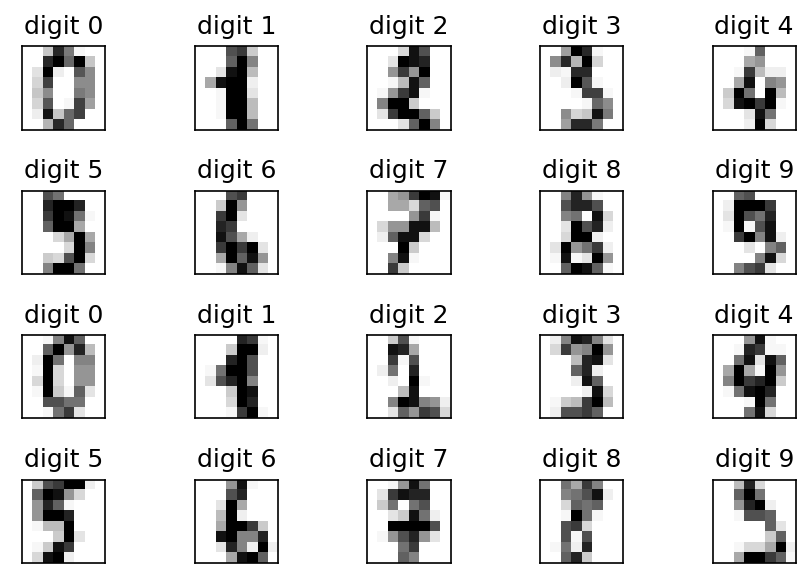

In [2]:
mpl.rcParams["figure.dpi"] = 150
num_rows = 4
num_cols = 5
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()

for index in range(num_rows * num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap="Greys", interpolation="nearest")
    ax[index].set_title("digit " + str(label))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Data Preprocessing

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

def get_accuracy(ys, ys_pred):
    assert ys.shape == ys_pred.shape
    assert ys.ndim == 1
    return np.sum(ys == ys_pred) / len(ys)

xs_train, xs_test, ys_train, ys_test = train_test_split(xs,
                                                        ys,
                                                        test_size=0.1,
                                                        stratify=ys)

## Classifier #1 Perceptron

In [4]:
# Example code, including training and testing, to observe the accuracies.
from sklearn.linear_model import Perceptron

# Tune the eta0 hyperparameter.
eta0_list = [0.0001, 0.001, 0.01, 0.1, 1]

# Your code here.
accuracies = []
for eta0 in eta0_list:
    model = Perceptron(max_iter=100, tol=1e-3, eta0=eta0)
    model.fit(xs_train, ys_train)
    ys_pred = model.predict(xs_test)
    accuracy = get_accuracy(ys_test, ys_pred)
    accuracies.append(accuracy)

for eta0, accuracy in zip(eta0_list, accuracies):
    print(f"eta0 = {eta0:.4f}, accuracy = {accuracy:.4f}")

eta0 = 0.0001, accuracy = 0.9389
eta0 = 0.0010, accuracy = 0.9556
eta0 = 0.0100, accuracy = 0.9500
eta0 = 0.1000, accuracy = 0.9500
eta0 = 1.0000, accuracy = 0.9611


## Classifier #2 Logistic Regression

In [5]:
# Your code, including training and testing, to observe the accuracies.

from sklearn.linear_model import LogisticRegression

# Tune the C hyperparameter.
C_list = [1e-3, 0.001, 0.01, 1, 10, 100]

# Your code here.
accuracies_log = []
for Ci in C_list:
  model = LogisticRegression(C = Ci, solver = 'liblinear', multi_class = 'ovr')
  model.fit(xs_train,ys_train)
  accuracy = model.score(xs_test,ys_test)
  accuracies_log.append(accuracy)

for Ci, accuracy_i in zip(C_list, accuracies_log):
  print(f"Ci = {Ci:.4f}, accuracy = {accuracy_i:.4f}")

Ci = 0.0010, accuracy = 0.9722
Ci = 0.0010, accuracy = 0.9722
Ci = 0.0100, accuracy = 0.9722
Ci = 1.0000, accuracy = 0.9667
Ci = 10.0000, accuracy = 0.9611
Ci = 100.0000, accuracy = 0.9556


## Classifier #3 SVM

In [6]:
# Your code, including training and testing, to observe the accuracies.

from sklearn.linear_model import SGDClassifier

# Tune the alpha hyperparameter.
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# Your code here.
acc_svm = []
for alpha_i in alpha_list:
  model = SGDClassifier(alpha = alpha_i, loss = 'hinge')
  model.fit(xs_train,ys_train)
  acc = model.score(xs_test,ys_test)
  acc_svm.append(acc)

for alpha_i, acc_i in zip(alpha_list, acc_svm):
  print(f"Ci = {alpha_i:.4f}, accuracy = {acc_i:.4f}")

Ci = 0.0001, accuracy = 0.9611
Ci = 0.0010, accuracy = 0.9389
Ci = 0.0100, accuracy = 0.9278
Ci = 0.1000, accuracy = 0.9389
Ci = 1.0000, accuracy = 0.9722
Ci = 10.0000, accuracy = 0.9611



## Classifier #4 Decision Tree

In [7]:
# Your code, including training and testing, to observe the accuracies.

from sklearn.tree import DecisionTreeClassifier

# Tune the max_depth hyperparameter.
max_depth_list = [12, 25, 50, None]

# Your code here.
acc_tree = []
for max_i in max_depth_list:
  model = DecisionTreeClassifier(criterion = 'gini', max_depth = max_i,random_state = 1)
  model.fit(xs_train,ys_train)
  acc = model.score(xs_test,ys_test)
  acc_tree.append(acc)

for depth_i, acc_i in zip(max_depth_list, acc_tree):
  print(f"Ci = {depth_i}, accuracy = {acc_i:.4f}")

Ci = 12, accuracy = 0.8056
Ci = 25, accuracy = 0.7944
Ci = 50, accuracy = 0.7944
Ci = None, accuracy = 0.7944



## Classifier #5 Random Forest

In [8]:
# Your code, including training and testing, to observe the accuracies.

from sklearn.ensemble import RandomForestClassifier

# Tune the n_estimators hyperparameter.
n_estimators_list = [10, 50, 100, 200]

# Your code here.
acc_Rforest = []
for n_est_i in n_estimators_list:
  model = RandomForestClassifier(n_estimators = n_est_i,criterion = 'gini')
  model.fit(xs_train,ys_train)
  acc = model.score(xs_test,ys_test)
  acc_Rforest.append(acc)

for n_est_i, acc_i in zip(n_estimators_list, acc_Rforest):
  print(f"Ci = {n_est_i}, accuracy = {acc_i:.4f}")

Ci = 10, accuracy = 0.9611
Ci = 50, accuracy = 0.9833
Ci = 100, accuracy = 0.9889
Ci = 200, accuracy = 0.9833


## Classifier #6 KNN

In [9]:
# Your code, including training and testing, to observe the accuracies.

from sklearn.neighbors import KNeighborsClassifier

# Tune the n_neighbors hyperparameter.
n_neighbors_list = [2, 3, 5, 10, 20]

# Your code here.
acc_knn = []
for n_nei_i in n_neighbors_list:
  model = KNeighborsClassifier(n_neighbors = n_nei_i,metric = 'minkowski')
  model.fit(xs_train,ys_train)
  acc = model.score(xs_test,ys_test)
  acc_knn.append(acc)

for n_est_i, acc_i in zip(n_neighbors_list, acc_knn):
  print(f"Ci = {n_est_i}, accuracy = {acc_i:.4f}")

Ci = 2, accuracy = 0.9944
Ci = 3, accuracy = 0.9833
Ci = 5, accuracy = 0.9889
Ci = 10, accuracy = 0.9944
Ci = 20, accuracy = 0.9833


## Discussions

Compare the performance of the classifiers. Which classifier(s) perform(s) the best and worst, and why?

In [10]:
name_list = ["Precetron","LogisticRegression", "SVM", "DecisionTree","RandomForest","KNN"]
acc_list = [accuracies,accuracies_log,acc_svm,acc_tree,acc_Rforest,acc_knn]

print("Minimum and Maximum of Accuracy among different Methods")
print("[Method] -- [Min] -- [Max]")
for name,acc_i in zip(name_list,acc_list):
  print(name,":",round(min(acc_i),5), round(max(acc_i),5))

Minimum and Maximum of Accuracy among different Methods
[Method] -- [Min] -- [Max]
Precetron : 0.93889 0.96111
LogisticRegression : 0.95556 0.97222
SVM : 0.92778 0.97222
DecisionTree : 0.79444 0.80556
RandomForest : 0.96111 0.98889
KNN : 0.98333 0.99444


Answer:


Among different methods, Decision Tree seems to be the worst classifier. 

As decision tree may tend to be prone to overfitting. Given a very tall tree, it is easy to overfit the train set by splitting the feature sest until the pure leaf nodes are gained.

Meanwhile, random forest seems to have the best accuracy among classifiers. It may due to the fact that the greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.